# Parinay Seth (20BAI10252) Randomwalk Data Science Assessment Level 3 

## Importing Necessary Libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Datasets

In [3]:
books = pd.read_csv('books.csv')
book_tags = pd.read_csv('book_tags.csv')
ratings = pd.read_csv('ratings.csv')


# Doing Sample check for all the datasets printing 5 rows 

In [4]:
books.sample(5)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
76,1524,27161156,27161156,47200486,30,62300547,9.780062e+12,J.D. Vance,2016.0,Hillbilly Elegy. A Memoir of a Family and Cult...,...,105770,13146,1429,4680,21299,44927,33435,https://images.gr-assets.com/books/1463569814m...,https://images.gr-assets.com/books/1463569814s...,0
230,5154,6952423,6952423,7187129,39,446569895,9.780447e+12,"Ozzy Osbourne, Chris Ayres",2009.0,I Am Ozzy,...,17959,1028,509,847,3207,5998,7398,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0
66,1234,67920,67920,2912372,36,446359408,9.780446e+12,Flora Rheta Schreiber,1973.0,Sybil,...,73855,1271,1086,3345,16767,26328,26329,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0
60,1068,29209,29209,29679,62,1573225789,9.781573e+12,James McBride,1996.0,The Color of Water: A Black Man's Tribute to H...,...,83888,4174,1206,3218,15996,32338,31130,https://images.gr-assets.com/books/1401311300m...,https://images.gr-assets.com/books/1401311300s...,0
246,5603,13331184,13331184,18538886,15,385535635,9.780386e+12,Jacob Tomsky,2012.0,"Heads in Beds: A Reckless Memoir of Hotels, Hu...",...,17744,2463,596,1836,5894,6199,3219,https://images.gr-assets.com/books/1348186171m...,https://images.gr-assets.com/books/1348186171s...,0


In [5]:
book_tags.sample(5)

,goodreads_book_id,tag_id,count
25295,6366437,25506,15
22737,1432370,4959,9
20333,561909,28341,79
29947,11330361,4600,23
37085,22716447,14719,25


In [6]:
ratings.sample(5)

,user_id,book_id,rating
220997,1360,8105,2
51950,17762,2233,5
189205,40320,372,3
197843,51994,15,4
92283,28449,128,4


## Some basic NULL Values check in all datasets 

In [25]:
books.isnull().sum()

book_id                       0
goodreads_book_id             0
best_book_id                  0
work_id                       0
books_count                   0
isbn                          9
isbn13                        8
authors                       0
original_publication_year     0
original_title                0
title                         0
language_code                35
average_rating                0
ratings_count                 0
work_ratings_count            0
work_text_reviews_count       0
ratings_1                     0
ratings_2                     0
ratings_3                     0
ratings_4                     0
ratings_5                     0
image_url                     0
small_image_url               0
NonEnglish                    0
dtype: int64

In [26]:
book_tags.isnull().sum()

goodreads_book_id    0
tag_id               0
count                0
dtype: int64

In [27]:
ratings.isnull().sum()

user_id    0
book_id    0
rating     0
dtype: int64

## Q1: How many books do not have an original title [books.csv]?

In [7]:
# First Counting the  of number of books without an original title
books_without_original_title = books['original_title'].isnull().sum()

# Print the result
print(f"The number of books without an original title: {books_without_original_title}")

The number of books without an original title: 36


## Q2: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

In [8]:
# Firstly removing the records with null values for 'original_title' in 'books.csv'
books = books.dropna(subset=['original_title'])


In [9]:
# Now removing corresponding records in 'book_tags.csv' and 'ratings.csv'
book_tags = book_tags[book_tags['goodreads_book_id'].isin(books['book_id'])]
ratings = ratings[ratings['book_id'].isin(books['book_id'])]


In [10]:
# Now Counting the number of unique books based on 'book_id'
unique_books_count = books['book_id'].nunique()

In [28]:
# Printing the result
print(f"The number of unique books after removing recording are : {unique_books_count}")

The number of unique books after removing recording are : 363


## Q3. How many unique users are present in the dataset [ratings.csv] ?

In [14]:
# Counting the number of unique users in ratings.csv
unique_users_count = ratings['user_id'].nunique()

# Printing the result
print(f"The number of unique users in the dataset: {unique_users_count}")

The number of unique users in the dataset: 40573


## Q4. How many unique tags are there in the dataset [book_tags.csv] ?

In [35]:
# Counting the number of unique tags
unique_tags_count = book_tags['tag_id'].nunique()

# Printing the result
print(f"The number of unique tags in the dataset: {unique_tags_count}")

The number of unique tags in the dataset: 100


## Q5. Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.

In [36]:
# Counting the number of unique tags
most_frequent_tag = book_tags['tag_id'].value_counts().idxmax()

# Printing the result
print(f"The number of frequently used tag in the dataset: {most_frequent_tag}")

The number of frequently used tag in the dataset: 30574


## Q6. Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .

In [37]:
# First we need to Merge the datasets on 'goodreads_book_id'
merged_data = pd.merge(book_tags, books, left_on='goodreads_book_id', right_on='book_id')

In [38]:
# Now Finding the book with the most number of counts of tags
most_tags_book = merged_data.groupby('title').size().idxmax()

# Printing the result
print(f"The book with the most number of counts of tags: {most_tags_book}")

The book with the most number of counts of tags: Beyond Band of Brothers: The War Memoirs of Major Dick Winters


## Q7. Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]

In [21]:
# First using the Group by to group 'tag_id' and 'goodreads_book_id' and count the number of users
tag_user_counts = book_tags.groupby(['tag_id', 'goodreads_book_id']).size().reset_index(name='user_records')

In [22]:
# Now the Sum the user records for each tag_id
top_tags = tag_user_counts.groupby('tag_id')['user_records'].sum().sort_values(ascending=False).head(20)

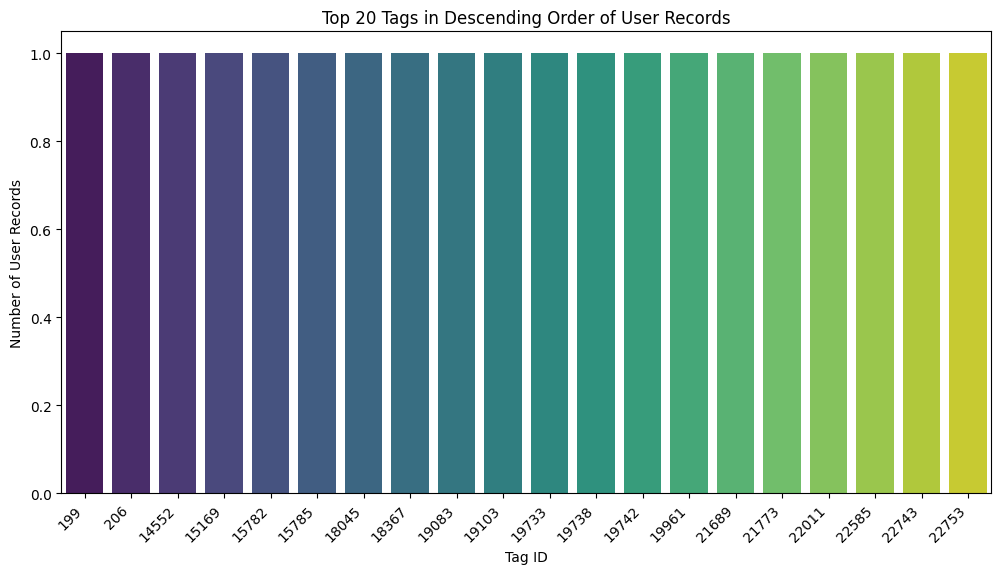

In [23]:
# Now Ploting a bar chart with help of Matplotlib and SeaBorn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_tags.index, y=top_tags.values, palette='viridis')
plt.xlabel('Tag ID')
plt.ylabel('Number of User Records')
plt.title('Top 20 Tags in Descending Order of User Records')
plt.xticks(rotation=45, ha='right')
plt.show()